## EDA:

* For a 24 month timespan (1 March 2019 - 31 March 2021)
    * General stats: Number of reviews by year, by rating, by Google device OS version
    * What is the trend for number of reviews over the timespan of the dataset
    * What is the trend for scores over the timespan of the dataset
    * Are there differences between ratings given the OS version?


* Were there more reviews submitted from 1 April 2020 - 1 April 2021 (COVID stay at home orders in many countries) than the pre-COVID time frame of 1 March 2019 - 31 March 2020?

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

%matplotlib inline

In [79]:
# Functions
def show_bar_plot(my_data, my_figsize, my_color, my_titletext, my_xlabeltext, my_ylabeltext, display_percent=False):
    my_data.plot.bar(fontsize=12, rot=30, alpha=0.85, figsize=my_figsize, color=my_color)
    plt.title(my_titletext, size='14')
    plt.xlabel(my_xlabeltext, size='12')
    plt.ylabel(my_ylabeltext, size='12')
    plt.yticks(size=12)
    bar_labels = my_data.values
  
    for i in range(len(my_data.values)):
        the_bar_label = bar_labels[i]
        if display_percent:
            the_bar_label = get_pretty_percent(bar_labels[i], reviews_df.shape[0])
        plt.text(x=i, y=bar_labels[i], s=the_bar_label, size=12, rotation=20, color='black')
    plt.show()


def show_unstackedbar_plot(my_data, my_figsize, my_colormap, my_titletext, my_xlabeltext, my_ylabeltext):
    my_data.unstack().plot.bar(fontsize=12, rot=30, alpha=0.85, figsize=my_figsize, colormap=my_colormap)
    plt.grid(color='black', alpha=0.1, linestyle ='-', linewidth=1)
    plt.title(my_titletext, size='14')
    plt.xlabel(my_xlabeltext, size='12')
    plt.ylabel(my_ylabeltext, size='12')
    plt.yticks(size=12)
    plt.show()

def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return "{:.1%}".format(percentage)


In [3]:
# Read in the collected and prepared data
cookpad_reviews_df = pd.read_csv('../data/cookpad_recent_reviews.csv')
cookpad_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4276 entries, 0 to 4275
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              4276 non-null   object
 1   userName              4276 non-null   object
 2   content               4276 non-null   object
 3   score                 4276 non-null   int64 
 4   reviewCreatedVersion  4276 non-null   object
 5   reviewTimestamp       4276 non-null   object
 6   replyContent          20 non-null     object
 7   repliedAt             20 non-null     object
 8   reviewYear            4276 non-null   int64 
 9   reviewDateString      4276 non-null   object
dtypes: int64(2), object(8)
memory usage: 334.2+ KB


In [4]:
# min and max year for Review - Assuming time is in GMT. Verify this if possible.
print('min review time')
print(cookpad_reviews_df['reviewYear'].min())
print(cookpad_reviews_df['reviewTimestamp'].min())

print('max review time')
print(cookpad_reviews_df['reviewYear'].max())
print(cookpad_reviews_df['reviewTimestamp'].max())

min review time
2019
2019-01-01 04:27:45
max review time
2021
2021-04-02 09:25:12


In [54]:
# select the reviews within our desired timeframe  24 month timespan (1 March 2019 - 31 March 2021)
reviews_df = cookpad_reviews_df.loc[
    (cookpad_reviews_df['reviewTimestamp'] >= '2019-03-01') & (cookpad_reviews_df['reviewTimestamp'] <= '2021-03-31')]

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 9 to 3908
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              3900 non-null   object
 1   userName              3900 non-null   object
 2   content               3900 non-null   object
 3   score                 3900 non-null   int64 
 4   reviewCreatedVersion  3900 non-null   object
 5   reviewTimestamp       3900 non-null   object
 6   replyContent          18 non-null     object
 7   repliedAt             18 non-null     object
 8   reviewYear            3900 non-null   int64 
 9   reviewDateString      3900 non-null   object
dtypes: int64(2), object(8)
memory usage: 335.2+ KB


In [55]:
print('min review time')
print(reviews_df['reviewTimestamp'].min())

print('max review time')
print(reviews_df['reviewTimestamp'].max())

min review time
2019-03-01 13:42:37
max review time
2021-03-30 21:12:28


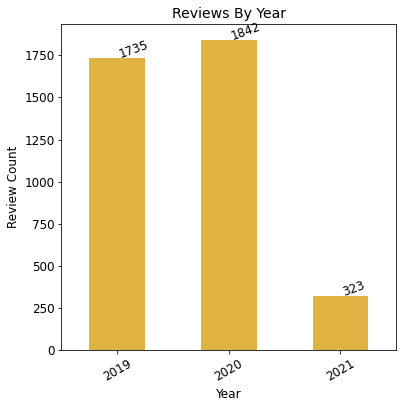

In [80]:
by_year = reviews_df.groupby(['reviewYear'])['reviewId'].count()
by_year.sort_index()

show_bar_plot(my_data=by_year, 
              my_figsize=(6,6), 
              my_color='goldenrod', 
              my_titletext='Reviews By Year', 
              my_xlabeltext='Year',
              my_ylabeltext='Review Count')


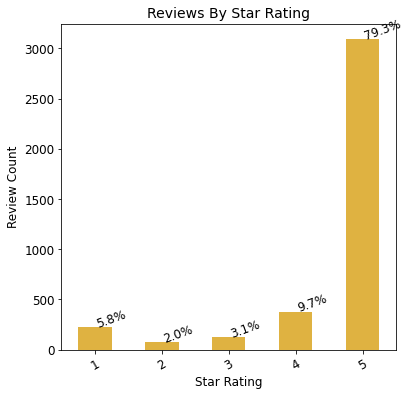

In [81]:
by_rating = reviews_df.groupby(['score'])['reviewId'].count()
by_rating.sort_index()

show_bar_plot(my_data=by_rating, 
              my_figsize=(6,6), 
              my_color='goldenrod', 
              my_titletext='Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='Review Count',
              display_percent=True)

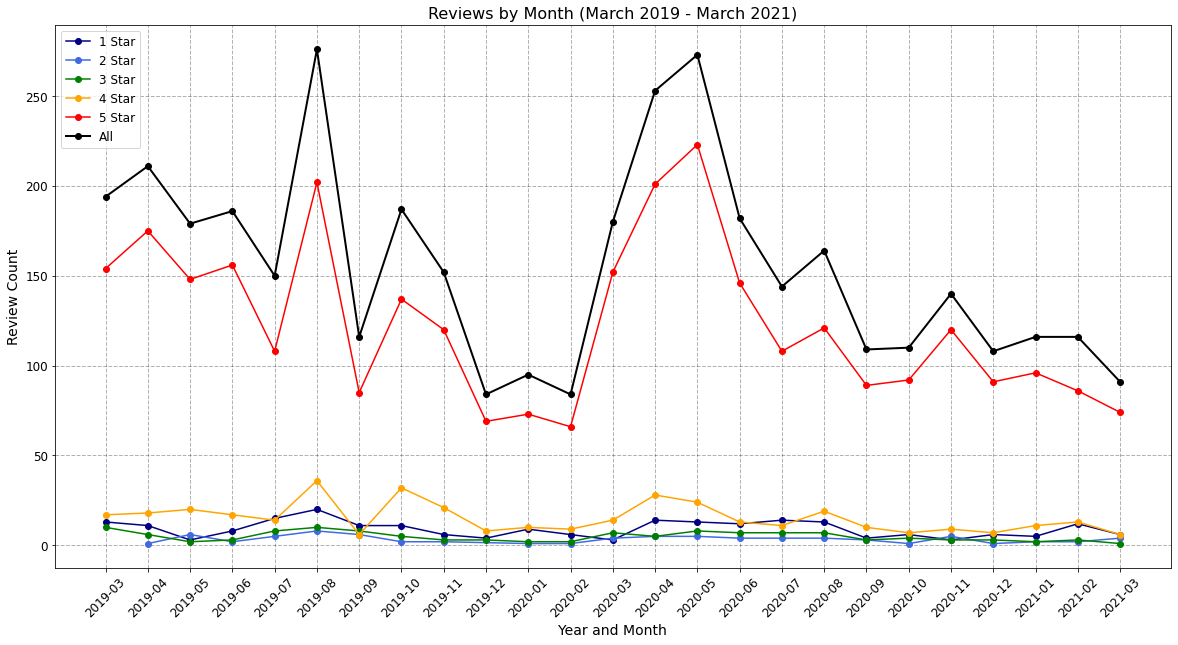

In [162]:
star1_reviews_by_ym  = reviews_df[reviews_df['score'] == 1].groupby(['reviewDateString'])['reviewId'].count()
star2_reviews_by_ym = reviews_df[reviews_df['score'] == 2].groupby(['reviewDateString'])['reviewId'].count()
star3_reviews_by_ym  = reviews_df[reviews_df['score'] == 3].groupby(['reviewDateString'])['reviewId'].count()
star4_reviews_by_ym  = reviews_df[reviews_df['score'] == 4].groupby(['reviewDateString'])['reviewId'].count()
star5_reviews_by_ym  = reviews_df[reviews_df['score'] == 5].groupby(['reviewDateString'])['reviewId'].count()
all_reviews_by_ym = reviews_df.groupby(['reviewDateString'])['reviewId'].count()


plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=12) #fontsize of the y tick labels
plt.rc('legend', fontsize=12) #fontsize of the legend

plt.figure(figsize=(20, 10))
plt.plot(star1_reviews_by_ym.index, star1_reviews_by_ym, color='navy', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star2_reviews_by_ym.index, star2_reviews_by_ym, color='royalblue', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star3_reviews_by_ym.index, star3_reviews_by_ym, color='green', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star4_reviews_by_ym.index, star4_reviews_by_ym, color='orange', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star5_reviews_by_ym.index, star5_reviews_by_ym, color='red', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(all_reviews_by_ym.index, all_reviews_by_ym, color='black', linewidth=2.0, marker='o', linestyle='solid')
plt.xticks(rotation=45)
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)

plt.title('Reviews by Month (March 2019 - March 2021)')
plt.xlabel('Year and Month')
plt.ylabel('Review Count')
plt.legend(['1 Star','2 Star','3 Star','4 Star', '5 Star', 'All'], loc=2)
plt.show()

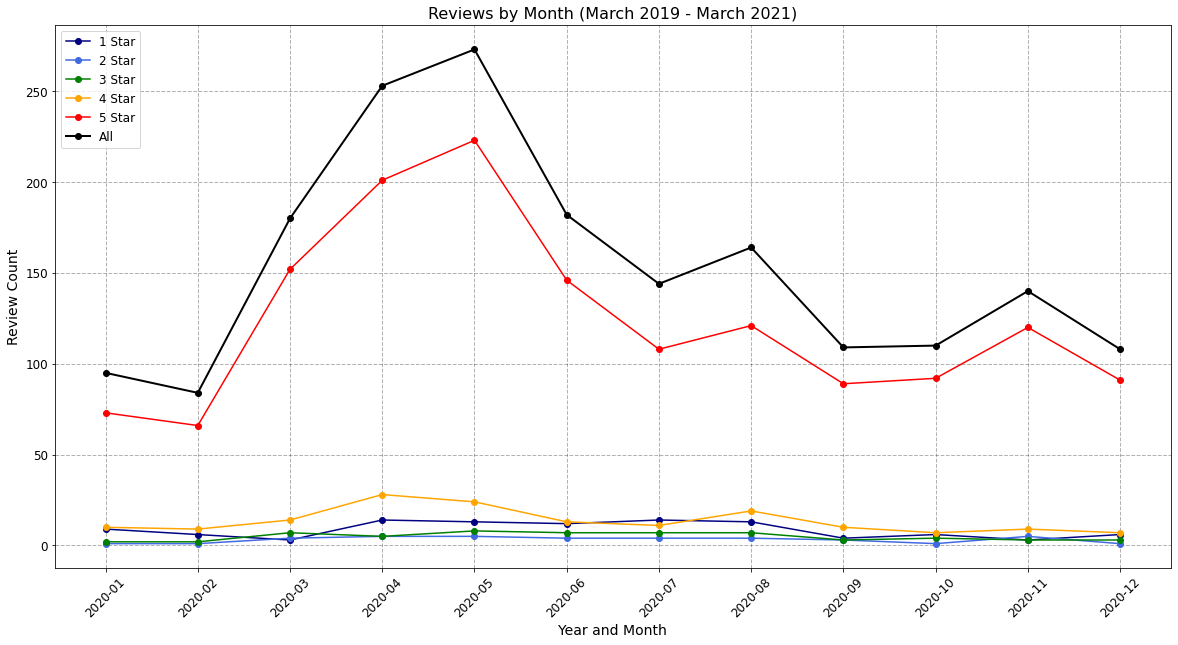

In [161]:
#Were there more reviews submitted from 1 April 2020 - 1 April 2021 (COVID stay at home orders in many countries) than the pre-COVID time frame of 1 March 2019 - 31 March 2020?

star1_2020reviews_by_ym = reviews_df.query('score == 1 & reviewYear == 2020').groupby(['reviewDateString'])['reviewId'].count()
star2_2020reviews_by_ym = reviews_df.query('score == 2 & reviewYear == 2020').groupby(['reviewDateString'])['reviewId'].count()
star3_2020reviews_by_ym = reviews_df.query('score == 3 & reviewYear == 2020').groupby(['reviewDateString'])['reviewId'].count()
star4_2020reviews_by_ym = reviews_df.query('score == 4 & reviewYear == 2020').groupby(['reviewDateString'])['reviewId'].count()
star5_2020reviews_by_ym = reviews_df.query('score == 5 & reviewYear == 2020').groupby(['reviewDateString'])['reviewId'].count()
all_2020reviews_by_ym = reviews_df.query('reviewYear == 2020').groupby(['reviewDateString'])['reviewId'].count()

plt.figure(figsize=(20, 10))
plt.plot(star1_2020reviews_by_ym.index, star1_2020reviews_by_ym, color='navy', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star2_2020reviews_by_ym.index, star2_2020reviews_by_ym, color='royalblue', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star3_2020reviews_by_ym.index, star3_2020reviews_by_ym, color='green', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star4_2020reviews_by_ym.index, star4_2020reviews_by_ym, color='orange', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star5_2020reviews_by_ym.index, star5_2020reviews_by_ym, color='red', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(all_2020reviews_by_ym.index, all_2020reviews_by_ym, color='black', linewidth=2.0, marker='o', linestyle='solid')
plt.xticks(rotation=45)
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)

plt.title('Reviews by Month (March 2019 - March 2021)')
plt.xlabel('Year and Month')
plt.ylabel('Review Count')
plt.legend(['1 Star','2 Star','3 Star','4 Star', '5 Star', 'All'], loc=2)
plt.show()

In [90]:
#how many unique versions are in the dataset?
print(len(reviews_df['reviewCreatedVersion'].unique()))

by_reviewCreatedVersion = reviews_df.groupby(['reviewCreatedVersion'])['reviewId'].count()
by_reviewCreatedVersion.sort_index()

show_bar_plot(my_data=by_reviewCreatedVersion, 
              my_figsize=(15,10), 
              my_color='goldenrod', 
              my_titletext='Reviews By Device/App Version', 
              my_xlabeltext='Device/App Version',
              my_ylabeltext='Review Count',
              display_percent=True)

198

In [136]:
low_ratings_by_version  = reviews_df[reviews_df['score'] < 5].groupby(['reviewCreatedVersion'])['reviewId'].count()
high_ratings_by_version  = reviews_df[reviews_df['score'] == 5 ].groupby(['reviewCreatedVersion'])['reviewId'].count()

low_ratings_versions = low_ratings_by_version.index
high_ratings_versions = high_ratings_by_version.index

low_ratings_nparray = np.array(low_ratings_by_version.index)
high_ratings_nparray = np.array(high_ratings_by_version.index)

In [139]:
print('Number of Versions in Lower ratings(<5 stars): ' + str(len(low_ratings_by_version)))
print('Number of Versions in 5 star ratings: ' + str(len(high_ratings_by_version)))

only_in_low = np.setdiff1d(low_ratings_nparray, np.array(high_ratings_nparray))
print('Number of Versions found ONLY in Lower ratings (>3 stars): ' + str(len(only_in_low)))

only_in_high = np.setdiff1d(np.array(high_ratings_nparray), low_ratings_nparray)
print('Number of Versions found ONLY in 5 star ratings (>3 stars): ' + str(len(only_in_high)))

Number of Versions in Lower ratings(<5 stars): 134
Number of Versions in 5 star ratings: 179
Number of Versions found ONLY in Lower ratings (>3 stars): 19
Number of Versions found ONLY in 5 star ratings (>3 stars): 64


In [141]:
print(only_in_low)

['1.38.1.0-android' '1.43.0.0-android' '2.109.0.0-android' '2.11'
 '2.112.0.0-android' '2.12.0.0-android' '2.130.0.0-android'
 '2.132.2.0-android' '2.148.0.0-android' '2.167.0.0-android'
 '2.183.0.0-android' '2.57.1.0-android' '2.72.0.0-android'
 '2.84.1.0-android' '3.25' '4.20' '6.47' '6.78' '7.02']


In [140]:
print(only_in_high)

['2.100.1.0-android' '2.104.0.0-android' '2.104.1.0-android'
 '2.104.3.0-android' '2.105.0.0-android' '2.108.0.0-android'
 '2.108.1.0-android' '2.110.0.0-android' '2.111.1.0-android'
 '2.114.0.0-android' '2.116.1.0-android' '2.119.0.0-android'
 '2.122.0.0-android' '2.128.1.0-android' '2.129.0.0-android'
 '2.131.0.0-android' '2.132.1.0-android' '2.134.1.0-android'
 '2.135.1.0-android' '2.135.2.0-android' '2.137.0.0-android'
 '2.138.0.0-android' '2.138.1.0-android' '2.140.0.0-android'
 '2.147.0.0-android' '2.149.0.0-android' '2.151.0.0-android'
 '2.154.0.0-android' '2.155.1.0-android' '2.155.2.0-android'
 '2.156.1.0-android' '2.158.0.0-android' '2.162.2.0-android'
 '2.163.1.0-android' '2.163.2.0-android' '2.164.1.0-android'
 '2.166.0.0-android' '2.169.0.0-android' '2.17.0.0-android'
 '2.174.0.0-android' '2.176.1.0-android' '2.179.0.0-android'
 '2.180.0.0-android' '2.182.0.0-android' '2.191.0.0-android'
 '2.194.1.0-android' '2.46.0.0-android' '2.48.2.0-android'
 '2.50.0.0-android' '2.51.1